<a href="https://colab.research.google.com/github/AjeetSingh02/TimeSeries/blob/master/heart_rate_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Steps to download from GCS(Google Cloud Storage)

In [0]:
project_id = 'bayer-demo-264504'

In [0]:
from google.colab import auth
auth.authenticate_user()

In [0]:
!gcloud config set project {project_id}

Updated property [core/project].


In [0]:
! gsutil cp gs://{"device_data_bucket"}/hear_rate.csv /content/data/heart_rate.csv

Copying gs://device_data_bucket/hear_rate.csv...
- [1 files][ 10.8 MiB/ 10.8 MiB]                                                
Operation completed over 1 objects/10.8 MiB.                                     


In [0]:
# Forecasting code

In [0]:
import itertools

import statsmodels.api as sm


In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 15, 8

In [0]:
df = pd.read_csv("/content/heart_rate.csv", parse_dates=["TIMESTAMP"])

In [0]:
df.head()

,SUBJECT_ID,STUDY_ID,TIMESTAMP,HEART_RATE,HEART_RATE_1,ACCURACY
0,1000019,A123000,2017-10-02 04:36:00+00:00,66,26,0
1,1000013,A123000,2017-10-02 04:38:00+00:00,68,28,0
2,1000017,A123000,2017-10-02 03:39:00+00:00,68,28,0
3,1000017,A123000,2017-10-02 04:41:00+00:00,68,28,0
4,1000019,A123000,2017-10-02 06:16:00+00:00,68,28,0


In [0]:
df.shape

(236187, 6)

In [0]:
# Taking only one subject ID == 1000001
df = df.iloc[np.where(df["SUBJECT_ID"] == 1000001)[0], :]

In [0]:
df.shape

(11273, 6)

In [0]:
df.head()

,SUBJECT_ID,STUDY_ID,TIMESTAMP,HEART_RATE,HEART_RATE_1,ACCURACY
2386,1000001,A123000,2017-10-02 04:22:00+00:00,69,39,0
2387,1000001,A123000,2017-10-02 04:23:00+00:00,69,39,0
3375,1000001,A123000,2017-10-02 04:18:00+00:00,60,40,0
3376,1000001,A123000,2017-10-02 04:19:00+00:00,60,40,0
3377,1000001,A123000,2017-10-02 04:20:00+00:00,60,40,0


In [0]:
drop_cols = ["SUBJECT_ID", "STUDY_ID", "HEART_RATE_1", "ACCURACY"]

In [0]:
df.drop(columns=drop_cols, inplace=True)

In [0]:
df.head(1)

,TIMESTAMP,HEART_RATE
2386,2017-10-02 04:22:00+00:00,69


In [0]:
# The data is of 8 days. the data of 8th day(2017-10-08) for testing the forecast.
df_1_7_day = df.iloc[np.where(df["TIMESTAMP"] < '2017-10-08')[0], :]
df_8th_day = df.iloc[np.where(df["TIMESTAMP"] >= '2017-10-08')[0], :]

In [0]:
# Setting the TIMESTAMP column as index
df_1_7_day = df_1_7_day.set_index("TIMESTAMP")
df_8th_day = df_8th_day.set_index("TIMESTAMP")

In [0]:
df_1_7_day.head()

,HEART_RATE
TIMESTAMP,
2017-10-02 04:22:00+00:00,69
2017-10-02 04:23:00+00:00,69
2017-10-02 04:18:00+00:00,60
2017-10-02 04:19:00+00:00,60
2017-10-02 04:20:00+00:00,60


In [0]:
df_8th_day.head()

,HEART_RATE
TIMESTAMP,
2017-10-08 04:41:00+00:00,67
2017-10-08 04:42:00+00:00,67
2017-10-08 04:18:00+00:00,68
2017-10-08 04:20:00+00:00,68
2017-10-08 04:21:00+00:00,68


In [0]:
# Sorting
df_1_7_day.sort_index(inplace=True)
df_8th_day.sort_index(inplace=True)

In [0]:
df_1_7_day[:10]

,HEART_RATE
TIMESTAMP,
2017-10-01 00:00:00+00:00,78
2017-10-01 00:01:00+00:00,76
2017-10-01 00:02:00+00:00,74
2017-10-01 00:03:00+00:00,74
2017-10-01 00:04:00+00:00,73
2017-10-01 00:05:00+00:00,77
2017-10-01 00:06:00+00:00,62
2017-10-01 00:07:00+00:00,77
2017-10-01 00:08:00+00:00,76


In [0]:
df_1_7_day[-10:]

,HEART_RATE
TIMESTAMP,
2017-10-07 23:50:00+00:00,66
2017-10-07 23:51:00+00:00,65
2017-10-07 23:52:00+00:00,66
2017-10-07 23:53:00+00:00,65
2017-10-07 23:54:00+00:00,65
2017-10-07 23:55:00+00:00,65
2017-10-07 23:56:00+00:00,65
2017-10-07 23:57:00+00:00,69
2017-10-07 23:58:00+00:00,85


In [0]:
y = df_1_7_day['HEART_RATE']

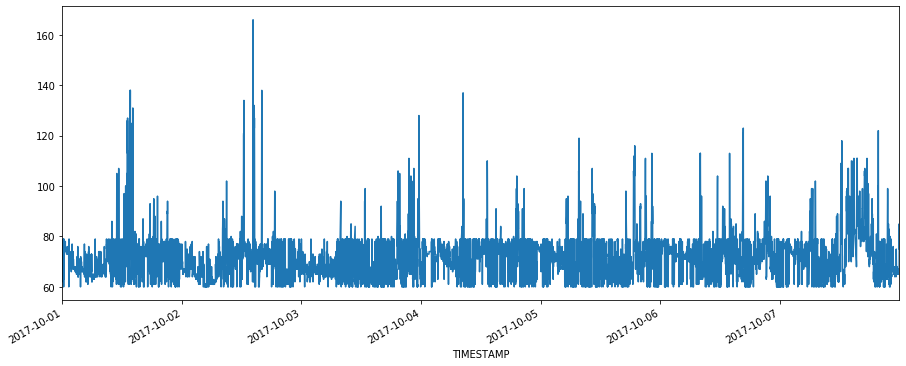

In [0]:
# Visualizing
y.plot(figsize=(15, 6))
plt.show()

In [0]:
# I dont see any upward or downward trend in this data
# It looks stationary
# Will work later on removing if required

In [0]:
# Visualizing our data using a method called time-series decomposition 
# that allows us to decompose our time series into 
# three distinct components: trend, seasonality, and noise.
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

**Time series forecasting with ARIMA (Autoregressive Integrated Moving Average)**

In [0]:
# ARIMA models are denoted with ARIMA(p, d, q)
# Where parameters stand for seasonality, trend and noise
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


This step is parameter Selection for our ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

In [0]:
temp_list = []

In [0]:
# Tring to find optimum parameters
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param, 
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            temp_list.append((param, param_seasonal, results.aic))
        except:
            continue

In [0]:
temp_list

[]

The above output suggests high error. Not sure about the issue. For the time being will keep the one among lowest. 

ARIMA(1,0, 1)x(1, 0, 1, 12)12

In [0]:
# Fitting the ARIMA model
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [0]:
df_1_7_day.index

DatetimeIndex(['2017-10-01 00:00:00+00:00', '2017-10-01 00:01:00+00:00',
               '2017-10-01 00:02:00+00:00', '2017-10-01 00:03:00+00:00',
               '2017-10-01 00:04:00+00:00', '2017-10-01 00:05:00+00:00',
               '2017-10-01 00:06:00+00:00', '2017-10-01 00:07:00+00:00',
               '2017-10-01 00:08:00+00:00', '2017-10-01 00:09:00+00:00',
               ...
               '2017-10-07 23:50:00+00:00', '2017-10-07 23:51:00+00:00',
               '2017-10-07 23:52:00+00:00', '2017-10-07 23:53:00+00:00',
               '2017-10-07 23:54:00+00:00', '2017-10-07 23:55:00+00:00',
               '2017-10-07 23:56:00+00:00', '2017-10-07 23:57:00+00:00',
               '2017-10-07 23:58:00+00:00', '2017-10-07 23:59:00+00:00'],
              dtype='datetime64[ns, UTC]', name='TIMESTAMP', length=9940, freq=None)

In [0]:
prophet

In [0]:
# d = {'a':[pd.to_datetime("2017-10-01 00:00:00", utc=True), 
#           pd.to_datetime("2017-10-01 00:01:00", utc=True),
#           pd.to_datetime("2017-10-01 00:02:00", utc=True),
#           pd.to_datetime("2017-10-01 00:03:00", utc=True),
#           pd.to_datetime("2017-10-01 00:04:00", utc=True)], 
     
#      'b':["nothing", "noth", "b", "f", "g"]}

In [0]:
# dd = pd.DataFrame(d)

In [0]:
# dd = dd.set_index("a")

In [0]:
# dd.index

In [0]:
# dd.index.inferred_freq

In [0]:
print(results.summary().tables[0])

In [0]:
print(results.summary().tables[1])

In [0]:
# Running diagnostics
# results.plot_diagnostics(figsize=(16, 8))
# plt.show()

Validating forecasts

To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 7th day which starts at 8562th index to the end of the data.

In [0]:
df_1_7_day.iloc[8562,:]

HEART_RATE    60
Name: 2017-10-07 00:00:00+00:00, dtype: int64

In [0]:
pred = results.get_prediction(start=pd.to_datetime("2017-10-07", utc=True), dynamic=False)

ax = y["2017-10-07":].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(20, 10))

ax.set_xlabel('Date')
ax.set_ylabel('Heart Rate')
plt.legend()
plt.show()

In [0]:
# Calculating MSE and RMSE
y_forecasted = pred.predicted_mean
y_truth = y["2017-10-07":]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 38.17
The Root Mean Squared Error of our forecasts is 6.18


Producing and visualizing forecasts

In [0]:
pred_uc = results.get_forecast(steps=100)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [0]:
pred_uc.prediction_results.forecasts

In [0]:
forec = pred_uc.prediction_results.forecasts

In [0]:
plt.plot([i for i in range(100)], forec[0])
plt.plot([i for i in range(100)], df_8th_day["HEART_RATE"].values[:100])

In [0]:
actual = df_8th_day["HEART_RATE"].values[:100]
forecasted = forec[0][:100]

In [0]:
for i in range(100):
    print(actual[i], forecasted[i])

**Using AY's Approach**

In [0]:
len(df_1_7_day)

9940

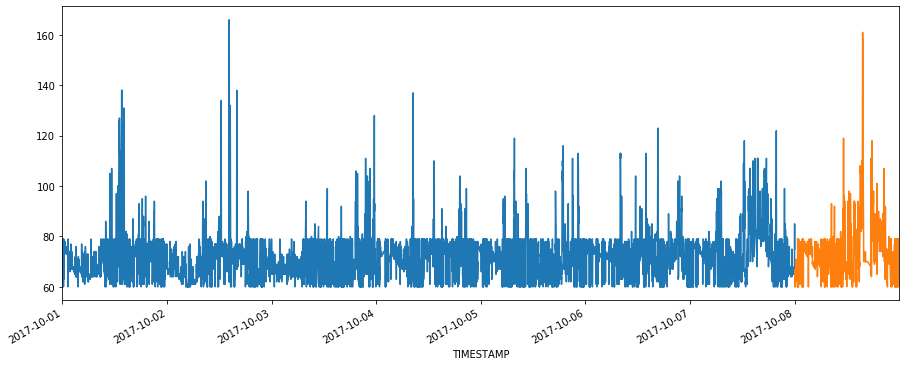

In [0]:
#divide into train and validation set
train = df_1_7_day
valid = df_8th_day


#plotting the data
train['HEART_RATE'].plot(figsize=(15, 6))
valid['HEART_RATE'].plot()

In [0]:
%%capture
! pip install pyramid-arima

In [0]:
%%capture
from pyramid.arima import auto_arima

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=64038.449, BIC=64081.674, Fit time=7.043 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=65690.301, BIC=65704.709, Fit time=0.208 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=65154.516, BIC=65176.129, Fit time=0.381 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=64871.278, BIC=64892.891, Fit time=1.322 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=63998.475, BIC=64034.496, Fit time=6.351 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=64053.573, BIC=64082.390, Fit time=4.154 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=63978.330, BIC=64021.555, Fit time=11.719 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=64520.534, BIC=64549.351, Fit time=2.026 seconds
Fit ARIMA: order=(2, 1, 4) seasonal_order=(0, 0, 0, 1); AIC=63976.947, BIC=64034.581, Fit time=23.611 seconds
Fit ARIMA: order=

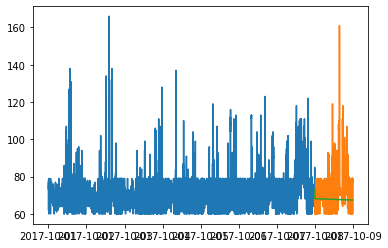

In [0]:
#building the model

model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [0]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(valid,forecast))
print(rms)

13.054986565801943


In [0]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # rolmean = pd.Series(timeseries).rolling(window=12).mean()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [0]:
ts = train["HEART_RATE"]

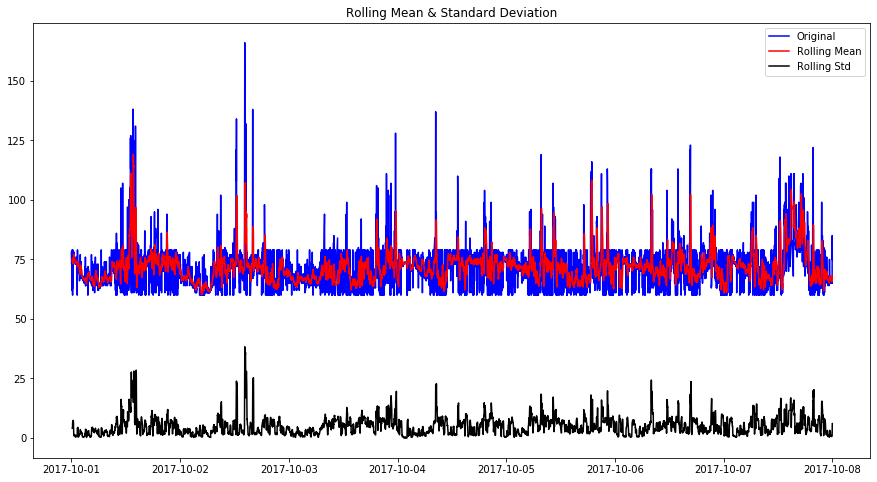

Results of Dickey-Fuller Test:
Test Statistic                -1.044220e+01
p-value                        1.511806e-18
#Lags Used                     3.200000e+01
Number of Observations Used    9.907000e+03
Critical Value (1%)           -3.431010e+00
Critical Value (5%)           -2.861832e+00
Critical Value (10%)          -2.566925e+00
dtype: float64


In [0]:
test_stationarity(ts)

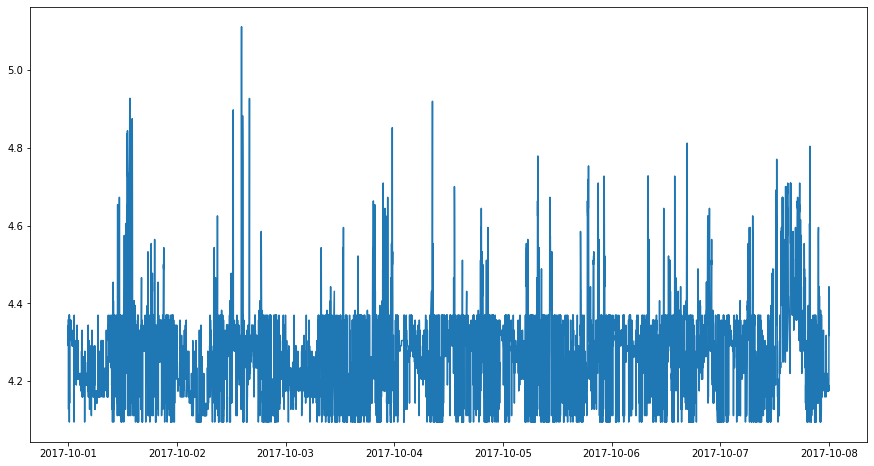

In [0]:
ts_log = np.log(ts)
plt.plot(ts_log)

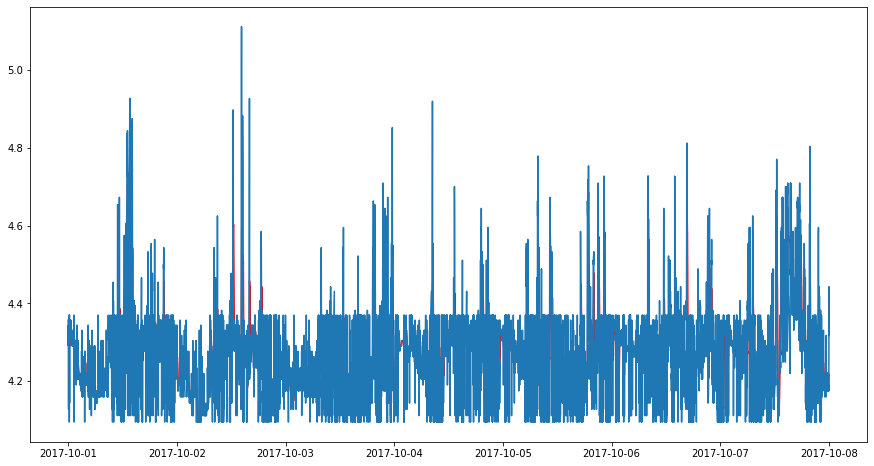

In [0]:
moving_avg = ts_log.rolling(window=12).mean()
plt.plot(moving_avg, color='red')
plt.plot(ts_log)

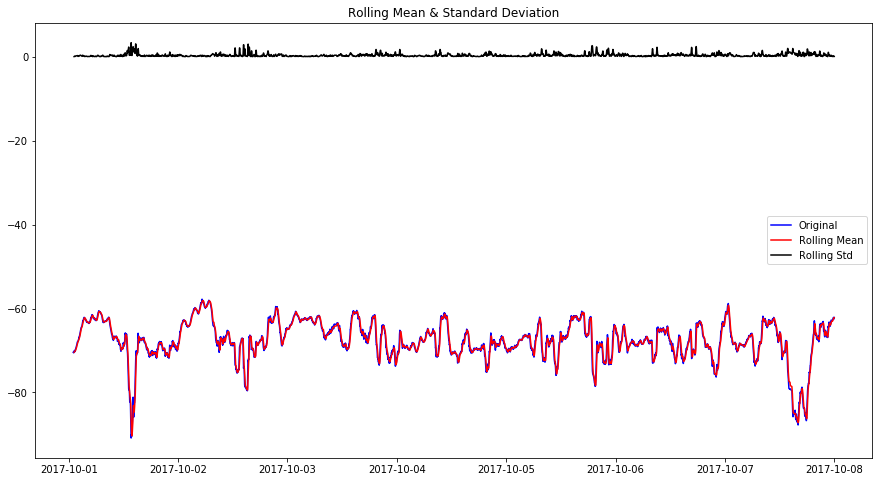

Results of Dickey-Fuller Test:
Test Statistic                -7.916335e+00
p-value                        3.827349e-12
#Lags Used                     3.200000e+01
Number of Observations Used    9.848000e+03
Critical Value (1%)           -3.431014e+00
Critical Value (5%)           -2.861834e+00
Critical Value (10%)          -2.566926e+00
dtype: float64


In [0]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

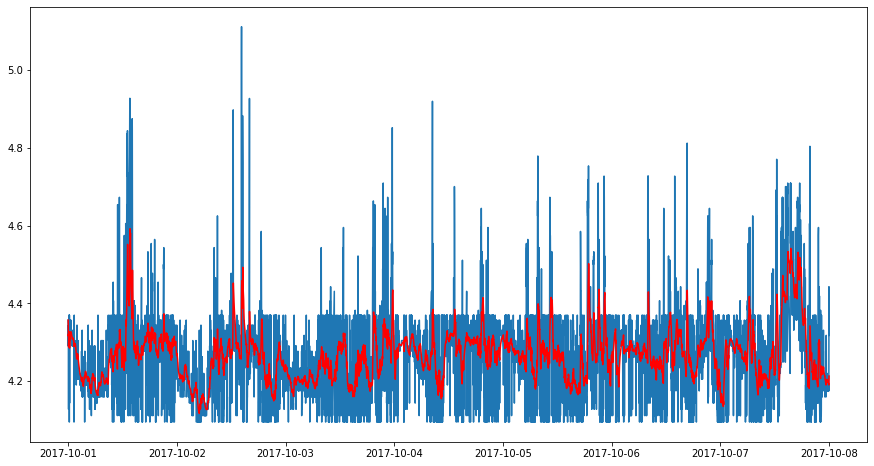

In [0]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

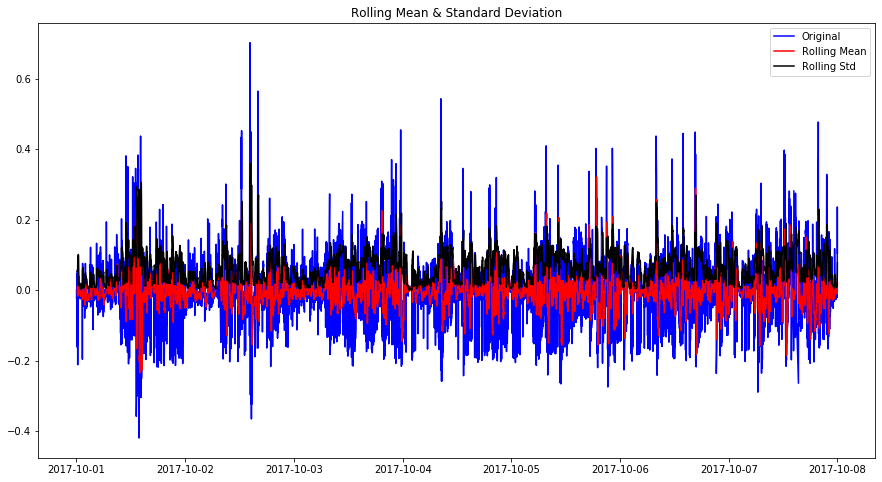

Results of Dickey-Fuller Test:
Test Statistic                -1.880126e+01
p-value                        2.022851e-30
#Lags Used                     3.800000e+01
Number of Observations Used    9.901000e+03
Critical Value (1%)           -3.431011e+00
Critical Value (5%)           -2.861832e+00
Critical Value (10%)          -2.566925e+00
dtype: float64


In [0]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

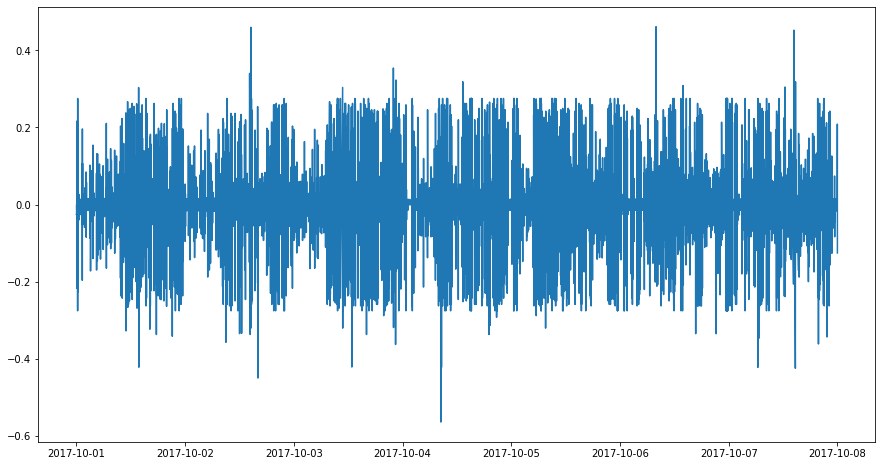

In [0]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

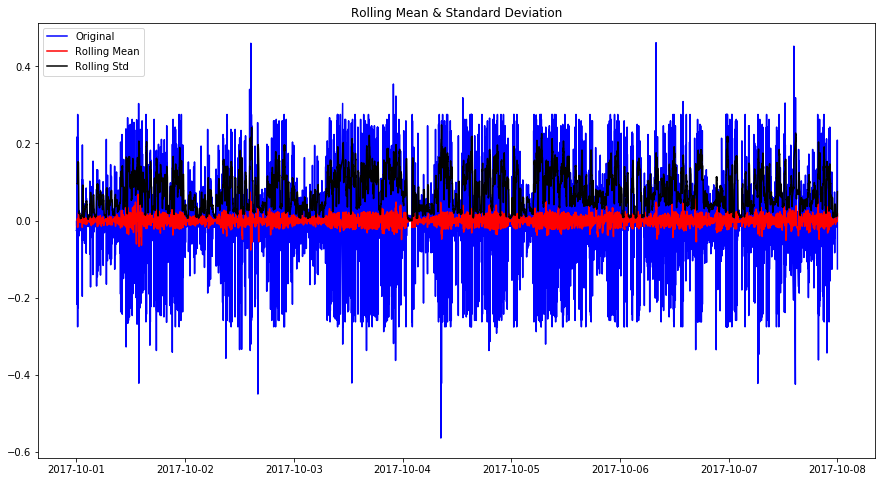

Results of Dickey-Fuller Test:
Test Statistic                  -27.349695
p-value                           0.000000
#Lags Used                       32.000000
Number of Observations Used    9906.000000
Critical Value (1%)              -3.431010
Critical Value (5%)              -2.861832
Critical Value (10%)             -2.566925
dtype: float64


In [0]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

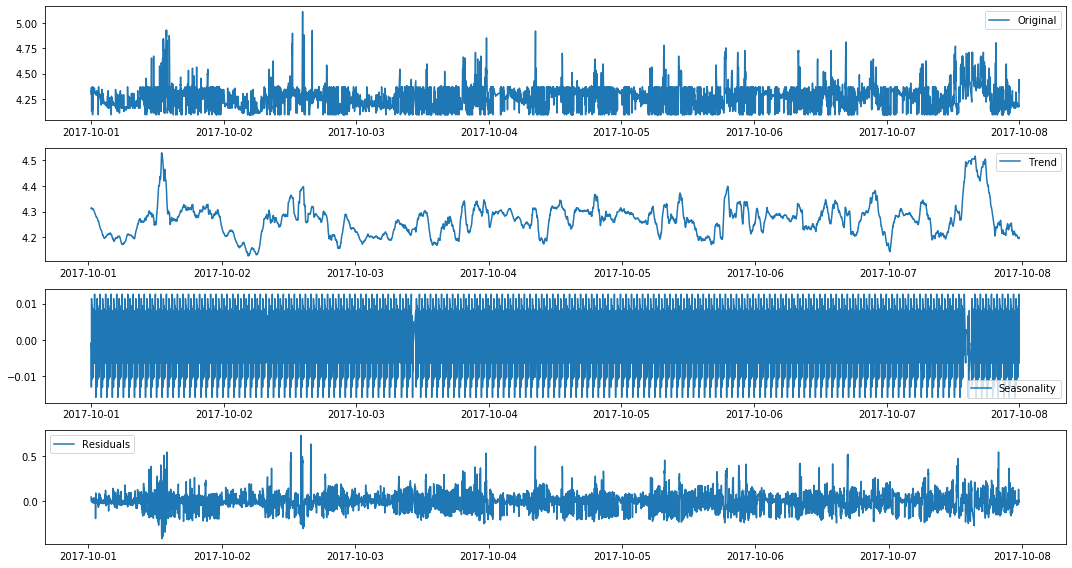

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, freq=60)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

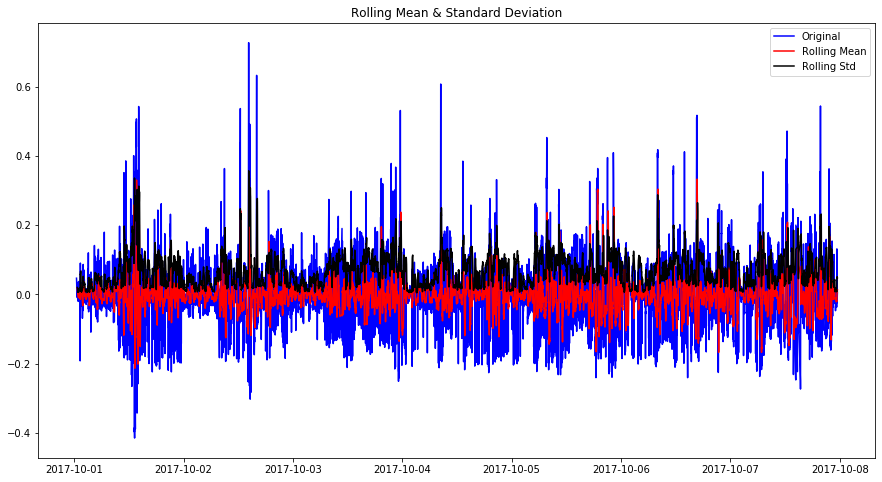

Results of Dickey-Fuller Test:
Test Statistic                  -23.784573
p-value                           0.000000
#Lags Used                       38.000000
Number of Observations Used    9841.000000
Critical Value (1%)              -3.431015
Critical Value (5%)              -2.861834
Critical Value (10%)             -2.566926
dtype: float64


In [0]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [0]:
from statsmodels.tsa.arima_model import ARIMA

In [0]:
# AR Model
dd = ts_log_decompose
model = ARIMA(dd, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
# plt.plot(df_1_7_day)
# plt.plot(results_AR.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-dd)**2))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [0]:
# MA Model
model = ARIMA(dd, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
# plt.plot(dd)
# plt.plot(results_MA.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-dd)**2))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [0]:
# Combined Model
model = ARIMA(dd, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
# plt.plot(dd)
# plt.plot(results_ARIMA.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-dd)**2))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [0]:
# Taking it back to original scale
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
# print(predictions_ARIMA_diff.head())

In [0]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
# print(predictions_ARIMA_diff_cumsum.head())

In [0]:
predictions_ARIMA_log = pd.Series(dd.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
# predictions_ARIMA_log.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [0]:
predictions_ARIMA.head()

TIMESTAMP
2017-10-01 00:00:00+00:00    1.047708
2017-10-01 00:01:00+00:00    1.047708
2017-10-01 00:02:00+00:00    1.047708
2017-10-01 00:03:00+00:00    1.047708
2017-10-01 00:04:00+00:00    1.047708
dtype: float64

Text(0.5, 1.0, 'RMSE: 70.6253')

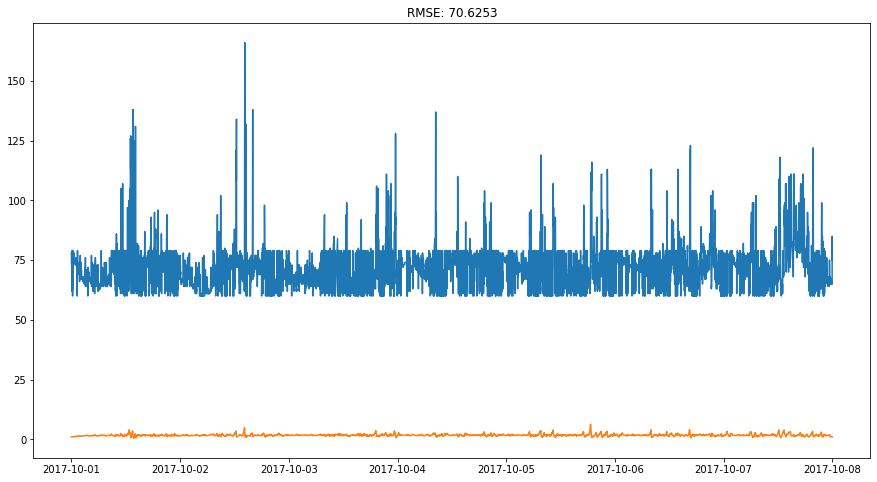

In [0]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))